In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat

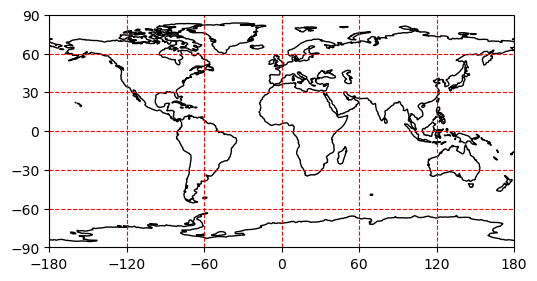

In [13]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,6))
ax_geo = fig.add_subplot(1,1,1, projection=proj)    
x_ticks = [-180, -120, -60, 0, 60, 120, 180]
y_ticks = [-90, -60, -30, 0, 30, 60, 90]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle='--', color='red')
ax_geo.add_feature(cfeat.COASTLINE)


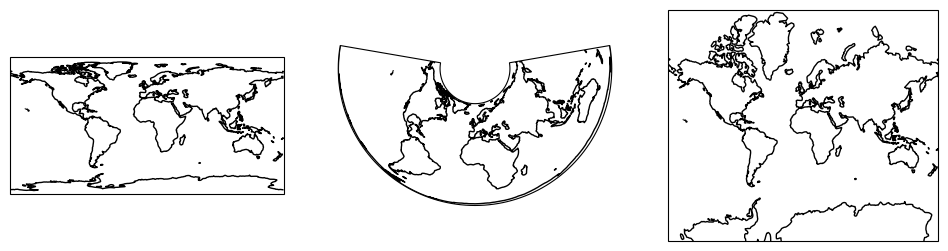

In [17]:
proj1 = ccrs.PlateCarree()  ## 等距圆柱投影
proj2 = ccrs.AlbersEqualArea()  ## 等面积投影
proj3 = ccrs.Mercator()   ## 等角
fig = plt.figure(figsize=(12,3))
ax_geo1 = fig.add_subplot(1,3,1, projection=proj1)   
ax_geo1.add_feature(cfeat.COASTLINE)
ax_geo2 = fig.add_subplot(1,3,2, projection=proj2)   
ax_geo2.add_feature(cfeat.COASTLINE)
ax_geo3 = fig.add_subplot(1,3,3, projection=proj3)   
ax_geo3.add_feature(cfeat.COASTLINE)



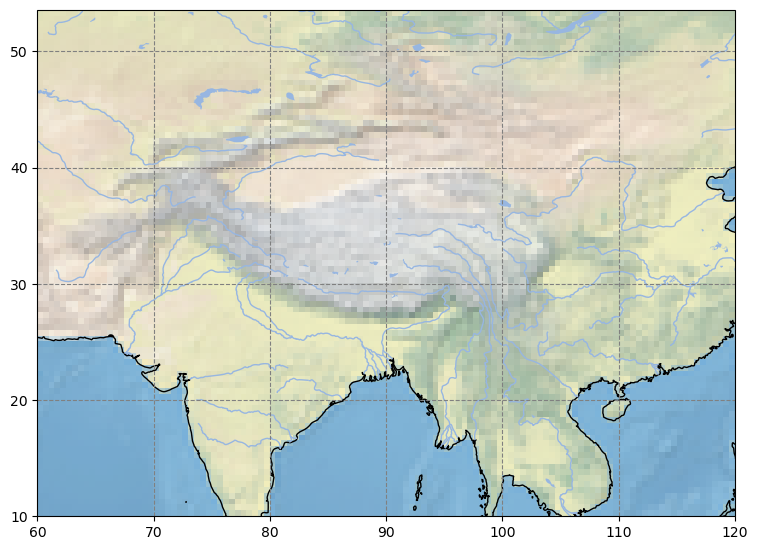

In [35]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,9))
ax_geo = fig.add_subplot(1,1,1, projection=proj)   
ax_geo.add_feature(cfeat.COASTLINE)
ax_geo.add_feature(cfeat.LAND)
ax_geo.add_feature(cfeat.OCEAN)
ax_geo.add_feature(cfeat.RIVERS)
ax_geo.add_feature(cfeat.LAKES)
ax_geo.stock_img()
ax_geo.set_extent([60,120,10,50])
x_ticks = [60, 70, 80, 90, 100, 110, 120]
y_ticks = [10, 20, 30, 40, 50]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle='--', color='grey')

In [39]:
import geopandas as gpd
path_kunming = 'data/Section-6/kunming_wgs84.gpkg'
kunming_gpd = gpd.read_file(path_kunming)
print(kunming_gpd.crs)
kunming_gpd.head()


EPSG:4326


,dt_adcode,dt_name,geometry
0,530102,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panglong,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,guandu,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,xishan,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."


<Axes: >

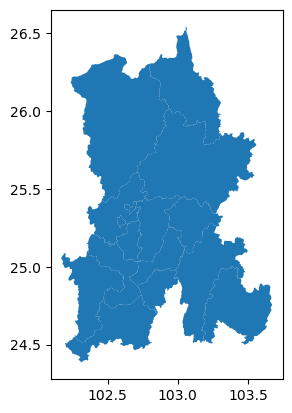

In [ ]:
kunming_gpd.plot()


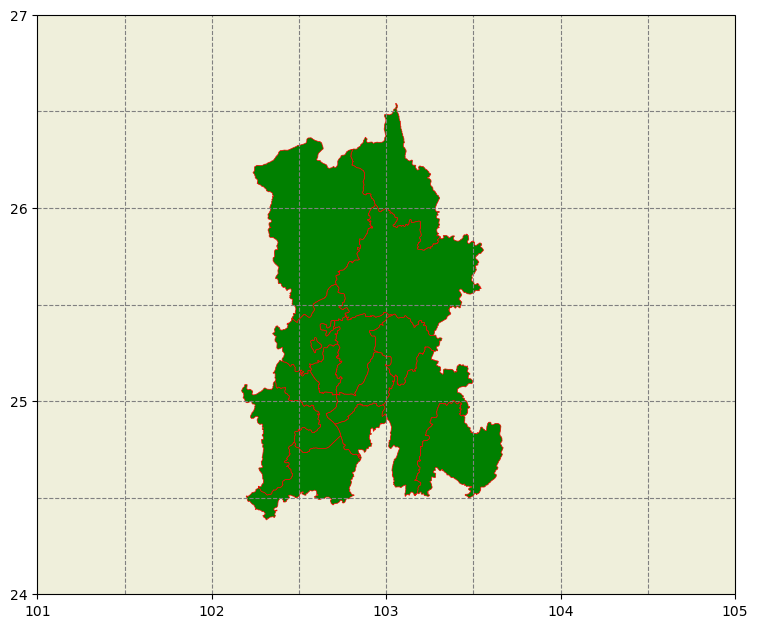

In [49]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,9))
ax_geo = fig.add_subplot(1,1,1, projection=proj)   
ax_geo.add_feature(cfeat.LAND)
kunming_gpd.plot(ax = ax_geo, facecolor='green', \
                 edgecolor='red', linewidth=0.5)
ax_geo.set_extent([101, 105, 24, 27])
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24, 25, 26, 27]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle='--', color='grey')

In [60]:
import rasterio as rio
import numpy as np
path_rsimg = 'data/Section-6/s2_kunming_chenggong_4bands_10m_wgs84.tif'
rsimg_rio = rio.open(path_rsimg)
array_rsimg = rsimg_rio.read()
array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 3000)/3000
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
extent_rsimg = [rsimg_rio.bounds[0], 
                rsimg_rio.bounds[2],
                rsimg_rio.bounds[1],
                rsimg_rio.bounds[3]]
extent_rsimg


[102.70324341425528, 103.00462417113745, 24.695850860264827, 24.99108870425977]

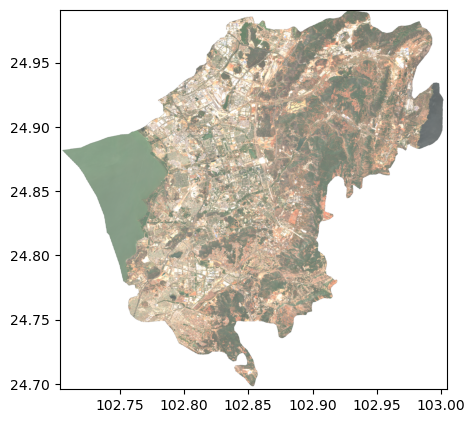

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)


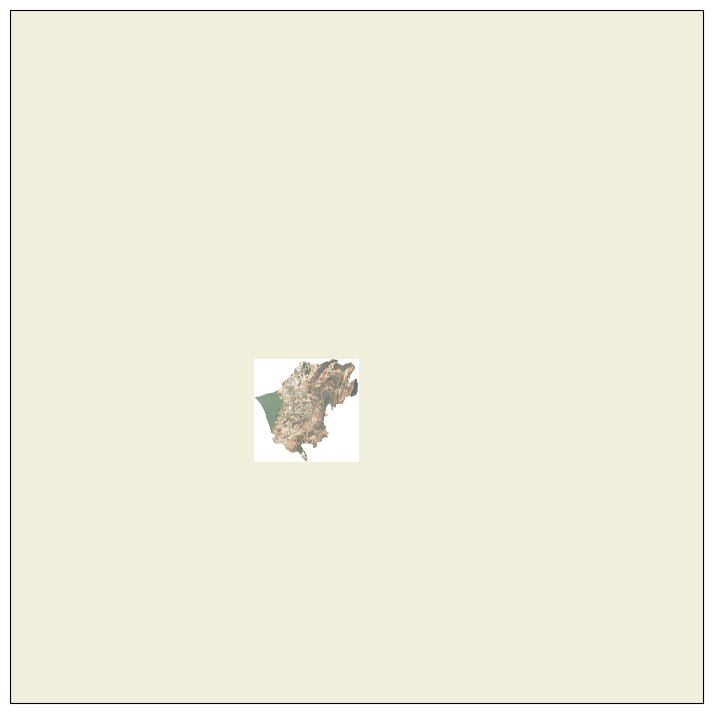

In [72]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,9))
ax_geo = fig.add_subplot(1,1,1, projection=proj)   
ax_geo.add_feature(cfeat.LAND)
ax_geo.set_extent([102,104,24,26])
# kunming_gpd.plot(ax=ax_geo)
ax_geo.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)


In [91]:
path_reg1 = 'data/Section-6/s2_kunming_chenggong_6bands_20m_subs.tif'
path_reg2 = 'data/Section-6/s2_kunming_chenggong_6bands_20m_subs2.tif'
rsimg1_rio = rio.open(path_reg1)
rsimg2_rio = rio.open(path_reg2)
rsimg2_rio.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 282,
 'height': 234,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 274580.0,
        0.0, -20.0, 2745880.0)}

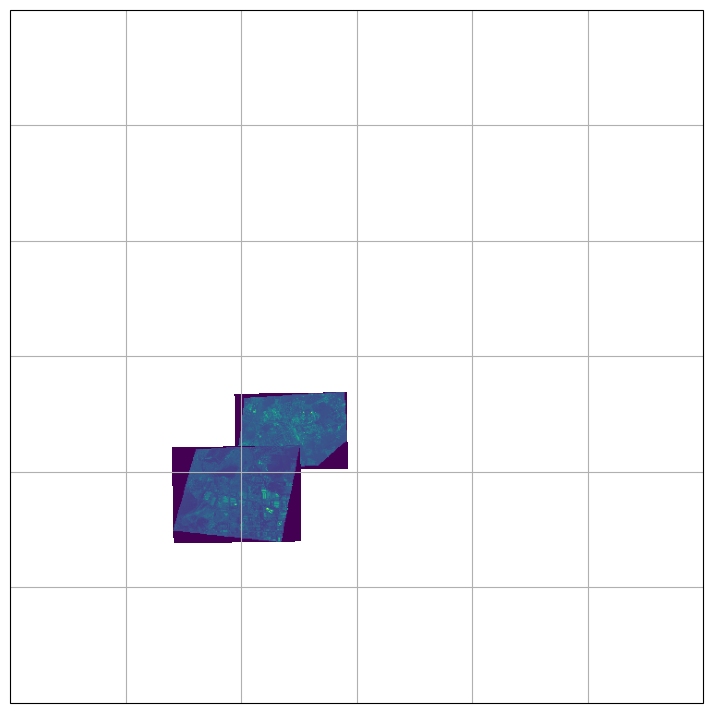

In [95]:
proj = ccrs.PlateCarree()
proj_utm = ccrs.UTM(zone=48, southern_hemisphere=False)
fig = plt.figure(figsize=(9,9))
ax_geo = fig.add_subplot(1,1,1, projection=proj)  
ax_geo.set_extent([102.7, 103, 24.7, 25])

extent_rsimg1 = [rsimg1_rio.bounds[0], 
                rsimg1_rio.bounds[2],
                rsimg1_rio.bounds[1],
                rsimg1_rio.bounds[3]]

extent_rsimg2 = [rsimg2_rio.bounds[0], 
                rsimg2_rio.bounds[2],
                rsimg2_rio.bounds[1],
                rsimg2_rio.bounds[3]]

ax_geo.imshow(rsimg1_rio.read(1), extent=extent_rsimg1, transform=proj_utm) 
ax_geo.imshow(rsimg2_rio.read(1), extent=extent_rsimg2, transform=proj_utm) 
ax_geo.gridlines()
